In [1]:
%matplotlib inline
import pyfolio as pf

In [2]:
import bt

In [3]:
data = bt.get('spy,aapl', start='2010-01-01')
data.head()

https://query1.finance.yahoo.com/v7/finance/download/SPY?period1=1262304000&period2=1507280849&interval=1d&events=history&crumb=f\u002FIGTiPJK5t


b'Skipping line 4: expected 1 fields, saw 2\n'


https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1262304000&period2=1507280856&interval=1d&events=history&crumb=1YntIDPWyZC


,spy,aapl
Date,,
2010-01-04,96.833946,27.505054
2010-01-05,97.090271,27.552608
2010-01-06,97.158661,27.114347
2010-01-07,97.568771,27.064222
2010-01-08,97.893463,27.244156


In [4]:
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [5]:
test = bt.Backtest(s, data)
res = bt.run(test)

s1
0% [############################# ] 100% | ETA: 00:00:00

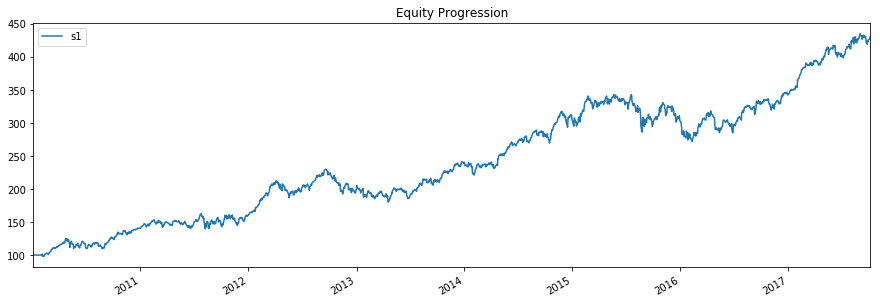

In [6]:
res.plot()

In [7]:
res.display()

Stat                 s1
-------------------  ----------
Start                2010-01-03
End                  2017-10-05
Risk-free rate       0.00%

Total Return         330.68%
Daily Sharpe         1.15
Daily Sortino        1.58
CAGR                 20.72%
Max Drawdown         -21.55%
Calmar Ratio         0.96

MTD                  1.11%
3m                   7.05%
6m                   9.45%
YTD                  25.80%
1Y                   30.42%
3Y (ann.)            15.22%
5Y (ann.)            14.19%
10Y (ann.)           20.72%
Since Incep. (ann.)  20.72%

Daily Sharpe         1.15
Daily Sortino        1.58
Daily Mean (ann.)    20.41%
Daily Vol (ann.)     17.72%
Daily Skew           -0.13
Daily Kurt           3.05
Best Day             6.01%
Worst Day            -5.98%

Monthly Sharpe       1.26
Monthly Sortino      2.66
Monthly Mean (ann.)  20.24%
Monthly Vol (ann.)   16.03%
Monthly Skew         0.06
Monthly Kurt         -0.54
Best Month           12.84%
Worst Month          -7.15%

Ye

In [8]:
res.display_lookback_returns()

,s1
mtd,1.11%
3m,7.05%
6m,9.45%
ytd,25.80%
1y,30.42%
3y,15.22%
5y,14.19%
10y,20.72%
incep,20.72%


In [9]:
res.display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2010   0      3.31  10.46   6.33  -4.77  -3.58   4.54  -5     12.84   4.94   1.69   5.17  40.12
  2011   3.75   3.78  -0.66   1.68  -0.88  -2.57   7.12  -3.4   -3.93   8.57  -2.99   3.47  13.79
  2012   8.67  11.6    6.87  -1.57  -3.51   2.56   2.87   5.95   1.45  -6.3   -0.32  -4.07  25.07
  2013  -4.63  -0.56   2.05   0.98   2.3   -6.59   9.53   2.69   0.5    7.1    4.99   1.73  20.77
  2014  -7.15   5.11   1.41   5.31   5.1    2.41   0.76   5.85  -1.54   4.78   6.67  -3.79  26.68
  2015   1.62   7.85  -2.36   0.78   2.9   -2.87  -0.54  -6.34  -2.34   8.43  -0.11  -6.4   -0.58
  2016  -6.26  -0.09   9.71  -6.79   4.49  -2      6.32   1.26   3.27  -0.65   0.74   3.42  12.87
  2017   3.28   8.66   2.49   0.5    4.07  -2.55   2.67   5.48  -2.01   1.11   0      0     25.8


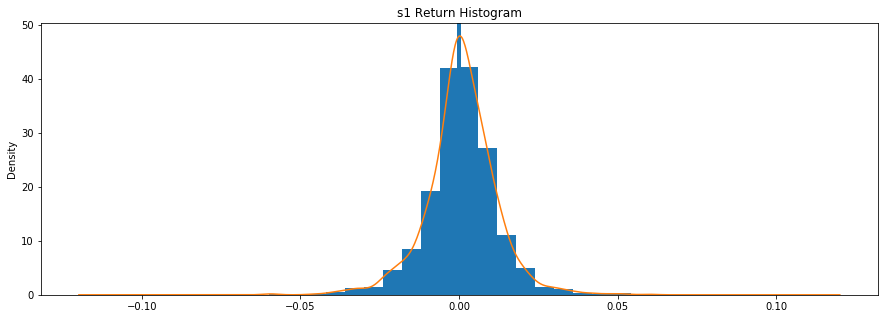

In [10]:
res.plot_histogram()

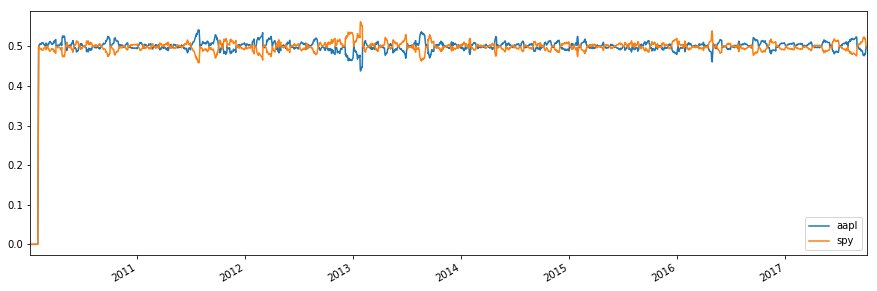

In [11]:
res.plot_security_weights()

s2
0% [############################# ] 100% | ETA: 00:00:00

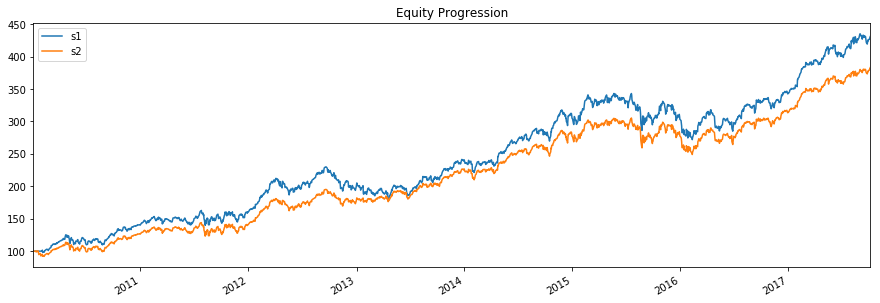

In [12]:
# create our new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data)
# we include test here to see the results side-by-side
res2 = bt.run(test, test2)

res2.plot()

In [13]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2010-01-03  2010-01-03
End                  2017-10-05  2017-10-05
Risk-free rate       0.00%       0.00%

Total Return         330.68%     282.84%
Daily Sharpe         1.15        1.15
Daily Sortino        1.58        1.55
CAGR                 20.72%      18.90%
Max Drawdown         -21.55%     -18.44%
Calmar Ratio         0.96        1.03

MTD                  1.11%       1.21%
3m                   7.05%       6.12%
6m                   9.45%       9.41%
YTD                  25.80%      22.21%
1Y                   30.42%      26.75%
3Y (ann.)            15.22%      14.02%
5Y (ann.)            14.19%      15.02%
10Y (ann.)           20.72%      18.90%
Since Incep. (ann.)  20.72%      18.90%

Daily Sharpe         1.15        1.15
Daily Sortino        1.58        1.55
Daily Mean (ann.)    20.41%      18.63%
Daily Vol (ann.)     17.72%      16.22%
Daily Skew           -0.13       -0.17
Da

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

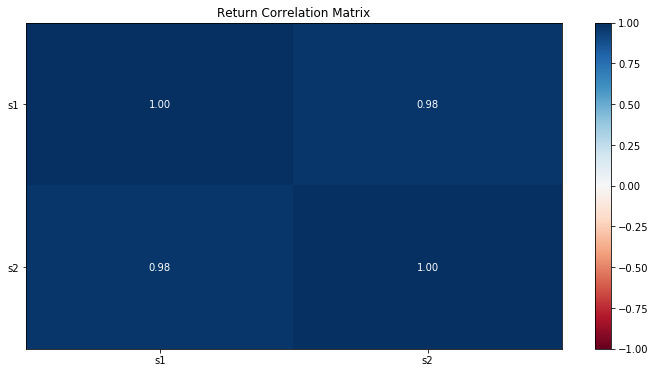

In [14]:
res2.plot_correlation()

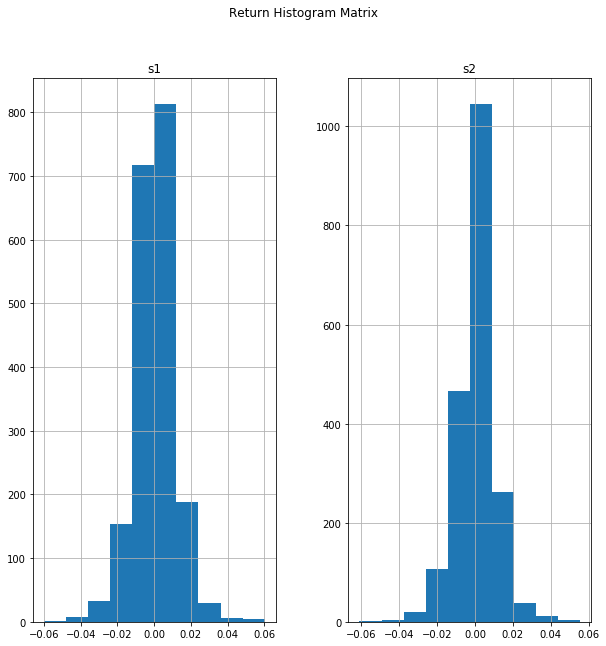

In [15]:
res2.plot_histograms()

/usr/local/lib/python3.6/site-packages/ffn/core.py:855: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  pd.scatter_matrix(ser, figsize=figsize, **kwargs)


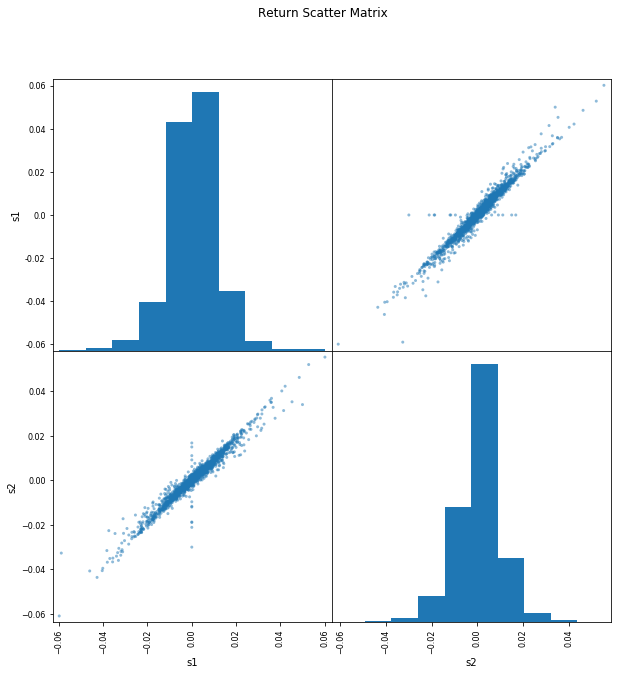

In [16]:
res2.plot_scatter_matrix()

# Returns, Positions, Transactions

In [17]:
res.get_transactions('s1').head()

price  quantity
Date       Security                     
2010-02-01 aapl      25.027143   19978.0
           spy       93.185493    5365.0
2010-03-01 aapl      26.859875    -440.0
           spy       95.603539     124.0
2010-04-01 aapl      30.327406    -623.0

In [18]:
res.backtests['s1'].positions.head()

,aapl,spy
2010-01-03,0.0,0.0
2010-01-04,0.0,0.0
2010-01-05,0.0,0.0
2010-01-06,0.0,0.0
2010-01-07,0.0,0.0


In [19]:
# returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(res)
# pf.create_full_tear_sheet(returns, positions, transactions, round_trips=True)